# A Comprehensive Guide to Decision Trees


**Purpose:** In this guide, we will delve into the fundamentals of Decision Trees, exploring how they work, their advantages and disadvantages, and practical implementation techniques. By the end of this guide, you will have a comprehensive understanding of Decision Trees and be equipped to apply them to various machine learning problems.

**Dataset:** We will be using a loan classification dataset. This dataset contains various demographic and financial features that could be used to build a classification model for predicting loan approval or denial. The loan_status column serves as the target variable for the classification task.

Happy learning 😊

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To keep things clear and simple in this tutorial, we will reduce the number of rows and features


In [4]:
# data source https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset/data
df = pd.read_csv('../dataset/loan.csv')
print(df)

# To keep things simple in this tutorial,
# We will reduce the number of features to 2 categorical and 2 numerical, and reduce rows to 10 rows
df = df[['gender', 'marital_status','education_level', 'loan_status']]
df_test = df.tail(30).reset_index(drop=True)

# preventing clear splits for age
#df.loc[8,'age']=27
#df.loc[9,'age']=27

df

    age  gender    occupation education_level marital_status  income  \
0    32    Male      Engineer      Bachelor's        Married   85000   
1    45  Female       Teacher        Master's         Single   62000   
2    28    Male       Student     High School         Single   25000   
3    51  Female       Manager      Bachelor's        Married  105000   
4    36    Male    Accountant      Bachelor's        Married   75000   
..  ...     ...           ...             ...            ...     ...   
56   39    Male     Architect        Master's        Married  100000   
57   25  Female  Receptionist     High School         Single   32000   
58   43    Male        Banker      Bachelor's        Married   95000   
59   30  Female        Writer        Master's         Single   55000   
60   38    Male          Chef     Associate's        Married   65000   

    credit_score loan_status  
0            720    Approved  
1            680    Approved  
2            590      Denied  
3          

,gender,marital_status,education_level,loan_status
0,Male,Married,Bachelor's,Approved
1,Female,Single,Master's,Approved
2,Male,Single,High School,Denied
3,Female,Married,Bachelor's,Approved
4,Male,Married,Bachelor's,Approved
...,...,...,...,...
56,Male,Married,Master's,Approved
57,Female,Single,High School,Denied
58,Male,Married,Bachelor's,Approved
59,Female,Single,Master's,Approved


# 1. Introduction

Decision Trees are one of the most intuitive and versatile tools in the field of machine learning. They are used for both classification and regression tasks, making them a fundamental technique that every data scientist should understand.

### What is a Decision Tree?
A Decision Tree is a flowchart-like structure in which each internal node represents a decision based on the value of a feature, each branch represents the outcome of the decision, and each leaf node represents a class label (in classification tasks) or a continuous value (in regression tasks). The paths from the root to the leaf represent classification rules or regression models.

### Why Use Decision Trees?
Decision Trees are popular due to their simplicity and interpretability. Unlike other complex models, Decision Trees mimic human decision-making processes, making it easy to understand and explain the results. They require minimal data preprocessing, can handle both numerical and categorical data, and are capable of capturing non-linear relationships between features and the target variable.

### Task 🎖️

Build a Classification Decision Tree to determine if a loan will be approved or not based on features such as age, gender, occupation, education level, marital status, income, and credit score.

# 2. Basic Concepts

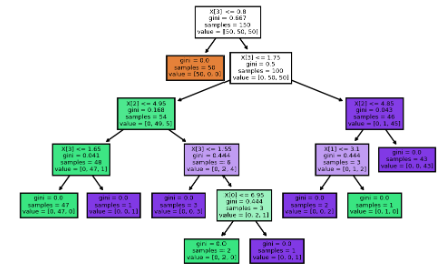
<br>*Source: Wikimedia Commons*

* <b>Root Node</b>: Define the starting point of the tree.
* <b>Leaf Nodes</b>: Explain the endpoints or outcomes of the tree.
* <b>Decision Nodes</b>: Describe nodes where a decision or split is made.
* <b>Branches</b>: Clarify the connections between nodes, representing outcomes of decisions.

# 3. Types of Decision Trees

* Classification Trees (CART): Used for categorical target variables.
* Regression Trees: Used for continuous target variables.

Since our target label `loan_status` is categorical (predicting "Approved" / "Denied"), we will use a Classification Tree.

# 4. How Decision Trees Work
Decision trees are usually constructed in a top-down, recursive manner, starting from the root node. At each node, the algorithm selects the feature that best splits the data based on a chosen splitting criterion. At each step, it selects the best split locally, without considering future steps, resulting in a series of greedy decisions. The process continues until a stopping criterion is met.  

In [ ]:
df

    gender marital_status education_level loan_status
0     Male        Married      Bachelor's    Approved
1   Female         Single        Master's    Approved
2     Male         Single     High School      Denied
3   Female        Married      Bachelor's    Approved
4     Male        Married      Bachelor's    Approved
..     ...            ...             ...         ...
56    Male        Married        Master's    Approved
57  Female         Single     High School      Denied
58    Male        Married      Bachelor's    Approved
59  Female         Single        Master's    Approved
60    Male        Married     Associate's    Approved

[61 rows x 4 columns]


# 5. Tree Construction

In our df, it can be seen that there is a clear threshold (split) using `credit_score` and `age` for loan decision. Credit scores below 650 are denied and credit scores above 650 are approved.

Let's break down how a decision tree would operate in this scenario.

    1. Root Node: The root node of the decision tree would consider the `credit_score` feature.

    2. Splitting Criterion: The decision tree algorithm would evaluate different splitting criteria (explained below) to determine the optimal threshold for dividing the dataset. However, since there's a clear split at 650 (low entropy), the decision tree would choose this threshold.

    3. Child Nodes: The tree would then have two child nodes: one for credit scores below 650 and another for scores above 650.

    4. Leaf Nodes: These child nodes would represent the final decision outcomes. For scores below 650, the leaf node would indicate denial, while for scores above 650, the leaf node would indicate approval.

    5. No Further Splitting: Since credit score is the only relevant feature and there's a clear threshold, the decision tree would not require further splitting or evaluation of additional features.
    
Therefore, while we can refer to credit_score to guide our loan approval decisions, for learning purposes, we will exclude `credit_score` to build our Decision Tree

Although the `credit_score` serves as a decisive factor in loan approval, for educational purposes, we'll construct a decision tree without considering it. 

By excluding the credit_score feature, the decision tree would rely on other factors such as `gender`, `age`, and `education_level` to make loan approval decisions. This approach allows us to understand how different features contribute to decision-making and provides insight into alternative decision pathways beyond `credit_score`.

In [ ]:
df = df[['gender', 'marital_status','education_level', 'loan_status']]
df

,gender,marital_status,education_level,loan_status
0,Male,Married,Bachelor's,Approved
1,Female,Single,Master's,Approved
2,Male,Single,High School,Denied
3,Female,Married,Bachelor's,Approved
4,Male,Married,Bachelor's,Approved
...,...,...,...,...
56,Male,Married,Master's,Approved
57,Female,Single,High School,Denied
58,Male,Married,Bachelor's,Approved
59,Female,Single,Master's,Approved


Now, there is no single feature with a clear split. This is where Decision Trees could be valuable - by identifying complex decision boundaries by recursively splitting data based on multiple features until homogeneous subsets are achieved

In [5]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# one hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'marital_status','education_level'])

# scaling - note this is optional for trees algo
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df_encoded[['age']])
#df_scaled = pd.DataFrame(scaled_features, columns=['scaled_age'])
#df_final = pd.concat([df_encoded, df_scaled], axis=1).drop(columns=['age'])

df_final = df_encoded
df_final

,loan_status,gender_Female,gender_Male,marital_status_Married,marital_status_Single,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's
0,Approved,False,True,True,False,False,True,False,False,False
1,Approved,True,False,False,True,False,False,False,False,True
2,Denied,False,True,False,True,False,False,False,True,False
3,Approved,True,False,True,False,False,True,False,False,False
4,Approved,False,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
56,Approved,False,True,True,False,False,False,False,False,True
57,Denied,True,False,False,True,False,False,False,True,False
58,Approved,False,True,True,False,False,True,False,False,False
59,Approved,True,False,False,True,False,False,False,False,True


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# split data into features and labels
X = df_final.drop('loan_status', axis=1)
y = df_final['loan_status']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

# create a Decision Tree Classifier model
clf = DecisionTreeClassifier(criterion='gini')

# train the model
clf = clf.fit(X_train, y_train)

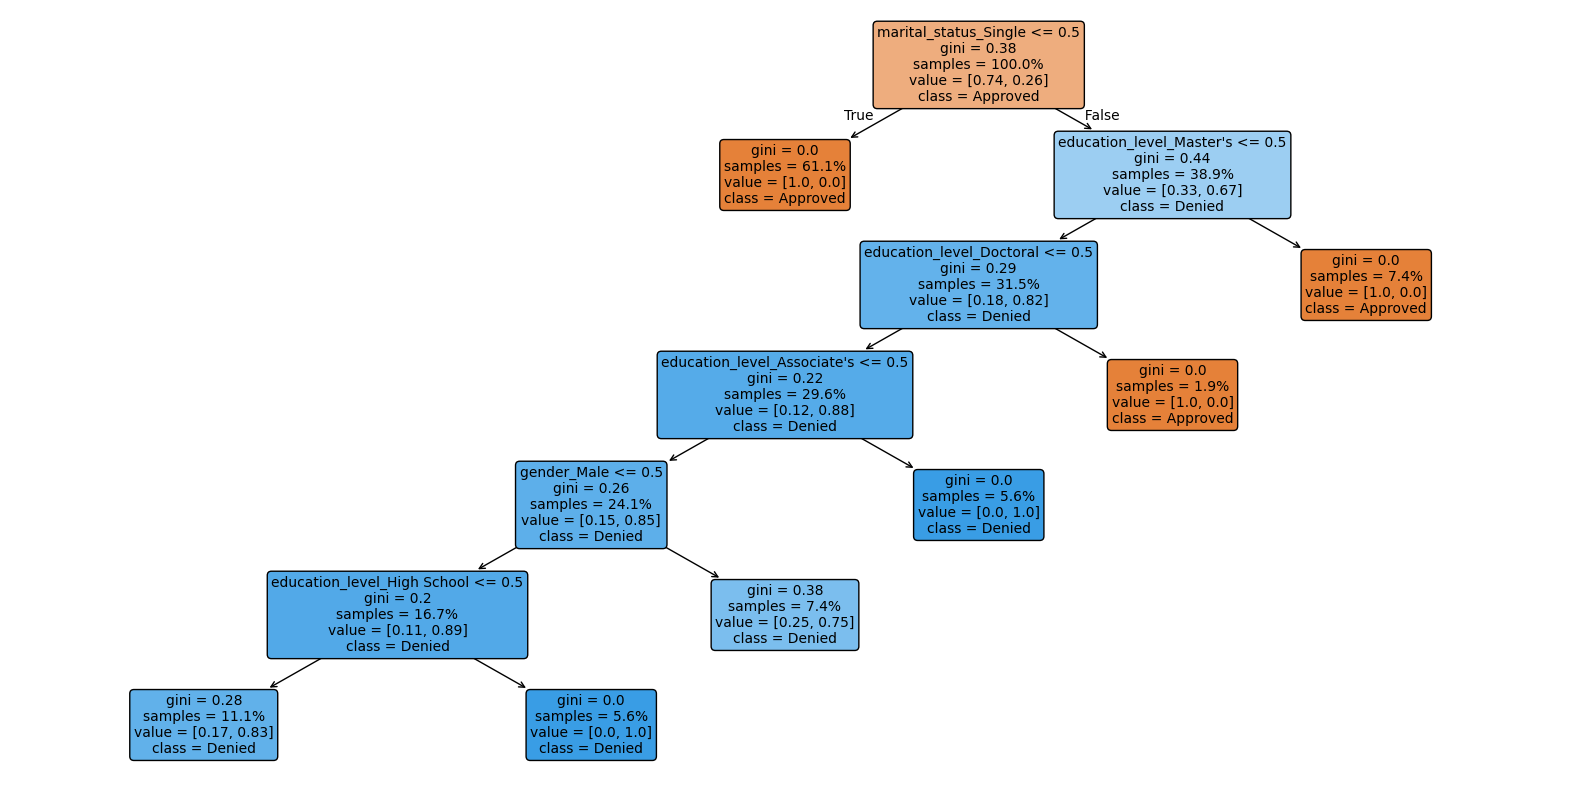

['Approved' 'Denied' 'Denied' 'Approved' 'Approved' 'Approved' 'Denied']
0     Approved
5       Denied
46    Approved
31    Approved
13    Approved
55    Approved
34      Denied
Name: loan_status, dtype: object


In [ ]:
def plot_decision_tree(model, feature_names, class_names):
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)
    
    return tree

plt.figure(figsize=(20,10))
plot_decision_tree(clf, X.columns, clf.classes_)
plt.show()

# print(clf.predict(X_test))
# print(y_test)

### Interpreting the results

In our tree, there are 2 layers, 2 splits, 1 root node, and 3 leaf nodes.

The tree starts by looking at the person's age. If their age is below a certain point, it checks their education level. If they have a Doctoral degree, they're approved. Otherwise, they're denied. If their age is above that point, they're approved straight away.

In our case, the decision tree analysis reveals a straightforward process with clear splits emerging after just two steps. (note: clear-cut splits are rare)

# 6. Feature importances

Which features are the most important in dividing the data?

In [8]:
feature_importance = clf.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"{X.columns[i]}: {importance}")

Feature Importance:
gender_Female: 0.0
gender_Male: 0.006079273729431793
marital_status_Married: 0.0
marital_status_Single: 0.6491043203371971
education_level_Associate's: 0.006565615627786335
education_level_Bachelor's: 0.0
education_level_Doctoral: 0.08200582656666461
education_level_High School: 0.006322444678609052
education_level_Master's: 0.24992251906031115


# 7. Splitting Criteria
Splitting criteria help determine how the data should be divided at each node of the tree, ultimately leading to the creation of more homogeneous child nodes.

#### a. Gini Index

The Gini Index is a measure of impurity or uncertainty commonly used in classification tasks. It quantifies how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. 

Gini_Index = 1 - (p_class1)^2 - (p_class2)^2 where:
- p_class1 is the proportion of samples in class 1
- p_class2 is the proportion of samples in class 2

Let's **calculate Gini Index** for `gender` and `education_level`

To calculate the Gini Index of the 'gender' feature on the 'loan_status', we'll follow these steps:
* Identify unique values of 'gender': Male and Female.
* For each unique value, calculate the proportion of 'Approved' and 'Denied' outcomes.
* Use the formula for Gini Index to compute the impurity for each value.
* Calculate the weighted average of the impurities to obtain the Gini Index for 'gender'.

In [9]:
feature = 'gender'

for value in df[feature].unique():
    subset = df[df[feature] == value]
    proportion = len(subset) / len(df)
    print(proportion)

0.5081967213114754
0.4918032786885246


In [10]:
def calculate_gini_index(df, feature, target):
    gini_index = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        proportion = len(subset) / len(df)
        
        # calculate proportion of outcomes for the current value
        outcomes_count = subset[target].value_counts()
        p_approved = outcomes_count.get('Approved', 0) / len(subset)
        p_denied = outcomes_count.get('Denied', 0) / len(subset)
        
        # calculate Gini impurity
        gini = 1 - (p_approved ** 2) - (p_denied ** 2)
        
        # update Gini Index
        gini_index += proportion * gini
    return gini_index

gini_gender = calculate_gini_index(df, 'gender', 'loan_status')
gini_education = calculate_gini_index(df, 'education_level', 'loan_status')

print("Gini Index for gender:", gini_gender)
print("Gini Index for education_level:", gini_education)

Gini Index for gender: 0.36590869028732587
Gini Index for education_level: 0.21722159997284735


A Gini Index of 0.4 for `gender` suggests moderate impurity, while 0.15 for `education_level` indicates low impurity. This implies that `gender` provides better discriminatory power for splitting the dataset into more distinct groups compared to `education_level`, making it a more effective splitting criterion for the decision tree.

#### b. Entropy or Information Gain

Entropy is another method that measures the uncertainty or impurity of a node in a decision tree. Higher entropy values indicate greater uncertainty, while lower values suggest more homogeneous subsets.

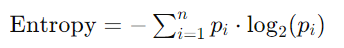 where:

- p_i is the proportion of samples belonging to class i in the dataset
- n is the number of classes or categories in the dataset

Let's calculate Entropy for `gender` and `education_level`

In [ ]:
import math

def calculate_entropy(df, feature, target):
    entropy = 0
    for value in df[feature].unique():
        subset = df[df[feature] == value]
        proportion = len(subset) / len(df)
        for outcome in subset[target].unique():
            p = len(subset[subset[target] == outcome]) / len(subset)
            if p != 0:
                entropy -= p * math.log2(p)
    return entropy

entropy_gender = calculate_entropy(df, 'gender', 'loan_status')
entropy_education_level = calculate_entropy(df, 'education_level', 'loan_status')

print('Entropy')
print("Gender:", entropy_gender)
print("Education:", entropy_education_level)

Entropy
Gender: 1.5854657428160965
Education: 2.338024338016321


Based on the entropy values:

The `education` feature split has a lower entropy (0.8), indicating better discriminatory power and resulting in more homogeneous subsets compared to the `gender` feature split (1.69).

Therefore, if we aim to maximize the purity and homogeneity of the resulting subsets, the `education_level` feature would be a more suitable choice for splitting the dataset in the decision tree model.

**The choice of splitting criterion (Gini Index vs. Entropy) can lead to different results as they measure impurity differently.**

While Gini Index and Entropy are both commonly used in decision trees, they prioritize different aspects of impurity.

- Gini Index focuses on how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.

- Entropy measures the uncertainty of a random variable, with lower entropy values indicating more homogeneous subsets.

Therefore, it's essential to consider the characteristics of your dataset and the specific goals of your analysis when choosing between Gini Index and Entropy. Ultimately, the decision should be based on which splitting criterion aligns better with your objectives and leads to more effective decision-making in the context of your problem.

(For Regression trees, we use mean squared error as splitting criteria)

# 8. Stopping Criteria

Stopping criteria in decision tree algorithms determine when to halt the splitting process and declare a leaf node. These are the common stopping criteria used to prevent overfitting and promote model generalization.

**Maximum Depth** `max_depth`: This criterion limits the maximum depth or levels of the tree. Once the tree reaches the specified maximum depth, further splitting is halted, preventing the tree from becoming too complex and overfitting the training data. 
- In a decision tree for predicting whether a customer will purchase a product based on their demographic and browsing history, setting a `max_depth` of 3 means the tree will only consider up to three levels of questions (features) before making a prediction

**Minimum Samples per Leaf** `min_samples_leaf`: With this criterion, splitting stops when the number of samples in a leaf node falls below a certain threshold. This prevents the creation of leaf nodes with too few samples, which may lead to overfitting or unreliable predictions.
- In a decision tree for classifying emails as spam or not spam, setting a `min_samples_leaf` of 10 ensures that each leaf node (outcome) must contain at least 10 email examples.

**Minimum Samples per Split** `min_samples_split`: This criterion specifies the minimum number of samples required to split a node further. If the number of samples at a node is below this threshold, splitting is halted, avoiding splits on small, potentially noisy subsets of data.
- In a decision tree for predicting housing prices based on features like square footage and neighborhood, setting a `min_samples_split` of 20 means that a node must have at least 20 data points (houses) before it can be split further. 

**Maximum Features** `max_features`: This hyperparameter governs the maximum number of features considered when searching for the best split. By regulating feature selection, it aids in fine-tuning the model's complexity and enhancing its generalization performance.
- In a random forest model for classifying images as cats or dogs based on pixel values, setting a `max_features` of 50 means that each split in the decision trees within the forest can only consider up to 50 randomly selected features (pixels) out of the total available. 

By incorporating these stopping criteria, decision trees can effectively balance between complexity and simplicity, resulting in models that are more interpretable, generalize better to unseen data, and are less prone to overfitting.

### Key Hyperparameters

In a DecisionTreeClassifier, key hyperparameters include `max_depth` to limit tree depth, `min_samples_split` to set minimum samples required for node splitting, `min_samples_leaf` to determine minimum samples per leaf, and `max_features` to control feature consideration for splitting. 

These hyperparameters regulate model complexity, prevent overfitting, and optimize performance. Adjusting them allows fine-tuning the classifier for specific datasets and tasks.

# 9. Pruning the Tree

Pruning in decision trees is vital to prevent overfitting, where the model memorizes noise rather than learning general patterns. Two main pruning techniques are employed:

1. Pre-Pruning (Early Stopping): This involves halting tree growth before it becomes overly complex by setting criteria such as `maximum depth` or `minimum samples per leaf`.

2. Post-Pruning (Cost Complexity Pruning): Also known as weakest link pruning, it involves growing the full tree and then removing less important branches based on their impact on overall performance. This is typically done by tuning a hyperparameter, such as the cost complexity parameter `ccp_alpha`, to balance between model complexity and accuracy on validation data.

These pruning techniques help optimize the decision tree's performance and ensure it captures meaningful patterns while avoiding unnecessary complexity.

# 10. Pros and Cons

* Pros:
    * Simplicity and ease of interpretation
    * Handles both numerical and categorical data
    * Requires little data preprocessing


* Cons:
    * Prone to overfitting
    * Can be unstable (small changes in data can lead to different trees)
    * Biased towards dominant classes (imbalanced data)

# 11. Performance Metrics
Performance metrics are essential for evaluating the effectiveness of machine learning models. For decision trees, various metrics are used depending on the task—classification or regression.


* Classification Metrics:
    * Accuracy
    * Precision
    * Recall
    * F1 Score
    * Confusion Matrix
    

* Regression Metrics:
    * Mean Absolute Error (MAE)
    * Mean Squared Error (MSE)
    * Root Mean Squared Error (RMSE)
    * R-squared
    
Let's now use our Decision Tree `clf` to predict our test set `df_test` (initialized at top of notebook) and evaluate its performance

In [ ]:
print(df_test.shape)
#df_test.drop(columns='credit_score', inplace=True)
df_test.head()

(30, 4)


In [ ]:
# split into X_test and y_test
X_test = df_test.drop('loan_status', axis=1)
y_test = df_test.loan_status

In [ ]:
X_test_encoded = pd.get_dummies(X_test, columns=['gender', 'marital_status','education_level'])

#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(X_test_encoded[['age']])
#X_test_scaled = pd.DataFrame(scaled_features, columns=['scaled_age'])
X_test_final = pd.concat([X_test_encoded], axis=1)

In [ ]:
df_final.columns

Index(['loan_status', 'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'education_level_Associate's',
       'education_level_Bachelor's', 'education_level_Doctoral',
       'education_level_High School', 'education_level_Master's'],
      dtype='object')


In [ ]:
X_test_final.columns

Index(['gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'education_level_Associate's',
       'education_level_Bachelor's', 'education_level_Doctoral',
       'education_level_High School', 'education_level_Master's'],
      dtype='object')


In [ ]:
common_columns = X_test_final.columns.intersection(df_final.columns)
X_test_final = X_test_final[common_columns]
X_test_final.columns

Index(['gender_Female', 'gender_Male', 'education_level_Associate's',
       'education_level_Bachelor's', 'education_level_Doctoral',
       'education_level_High School', 'education_level_Master's',
       'scaled_age'],
      dtype='object')

: 

: 

In [ ]:
# Prediction
y_pred = clf.predict(X_test_final)

In [ ]:
results = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})

results

,Predicted,Actual
0,Approved,Approved
1,Approved,Approved
2,Approved,Approved
3,Denied,Denied
4,Approved,Approved
5,Approved,Approved
6,Denied,Denied
7,Approved,Approved
8,Denied,Denied
9,Approved,Approved


We can now view the evaluation metrics (accuracy, precision, recall, F1) using `confusion_matrix` from sklearn. (can also be manually calculated by extracting tp, tn, fp, fn counts)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[21,  1],
       [ 0,  8]])

A `classification_report` is helpful too

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Approved       1.00      0.95      0.98        22
      Denied       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



The model scored high across all metrics - accuracy, precision, recall, weighted F1 avg.

# 12. Hyperparameter Tuning

Finally, hyperparameter tuning is crucial for optimizing the performance of machine learning models. It involves selecting the best set of hyperparameters, which are parameters that control the learning process of the model and are not learned from the data. Two common techniques for hyperparameter tuning are `Grid Search` and `Random Search`.

* Grid Search: Grid Search is an exhaustive search technique that evaluates the model's performance for all possible combinations of hyperparameters within a predefined grid. It's computationally expensive but guarantees finding the best hyperparameters within the specified search space.

* Random Search: Random Search selects hyperparameters randomly from the search space and evaluates the model's performance for a specified number of iterations. It's less computationally intensive than Grid Search but may not find the optimal hyperparameters as quickly.

Cross-validation is a fundamental practice in machine learning model development, and it's highly recommended regardless of the specific modeling task. This is to ensure that the model's performance estimates are reliable and generalize well to unseen data.

Let's see how `GridSearchCV` can be implemented

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]    
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_final)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Approved       1.00      0.95      0.98        22
      Denied       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
accuracy_scores = grid_search.cv_results_['mean_test_score']
accuracy_scores

array([0.8, 0.8, 0.7, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.7, 0.8,
       0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.8, 0.7, 0.7, 0.7,
       0.7, 0.8, 0.8, 0.7, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.7,
       0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.8, 0.7, 0.7,
       0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8,
       0.7, 0.8, 0.8, 0.7, 0.7, 0.7, 0.7])

: 

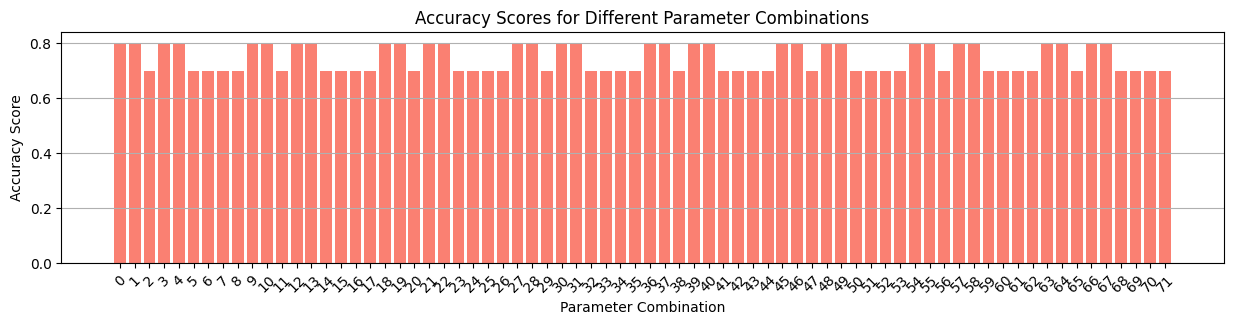

: 

In [ ]:
# plot the accuracy scores across different parameters combinations
plt.figure(figsize=(15,3))
plt.bar(range(len(accuracy_scores)), accuracy_scores, color='salmon')
plt.xlabel('Parameter Combination')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Parameter Combinations')
plt.xticks(range(len(accuracy_scores)), rotation=45)
plt.grid(axis='y')
plt.show()

GridSearchCV systematically explores various hyperparameter combinations to optimize model performance, using accuracy as the scoring metric in this instance. The process automates hyperparameter tuning, helping to fine-tune the Decision Tree Classifier model efficiently. 

By visualizing the accuracy scores for different parameter combinations, we identify the optimal configuration for our model. Overall, `GridSearchCV` streamlines the tuning process, enhancing model accuracy effectively.

# 13. Further Learning
Advanced methods include exploring Ensemble Methods such as Random Forests and Boosting algorithms like AdaBoost and Gradient Boosting. These techniques combine multiple decision trees to enhance model performance by reducing overfitting and improving predictive accuracy. 

### Random Forests
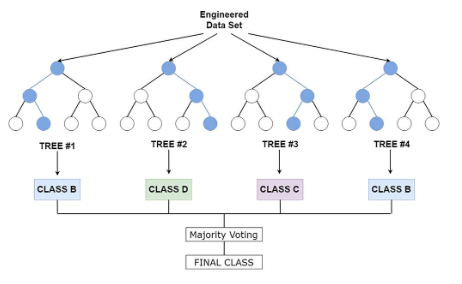
<br>*Random Forest | Source: PICRYL Public Domain*

### SMOTE

SMOTE, or Synthetic Minority Over-sampling Technique, is a vital tool for handling imbalanced data in machine learning. It helps address situations where one class greatly outnumbers the other, leading to biased models favoring the majority class. For instance, in medical diagnostics, rare diseases are often underrepresented in datasets. 

By using SMOTE, we can create synthetic samples of the minority class, ensuring a more balanced dataset and improving the model's ability to learn effectively. This technique is valuable across various domains where class imbalances pose challenges to model performance.

# 14. Summary

In summary, Decision Trees are like flowcharts for making decisions in machine learning. They start at the top with a question (the root node) and then split into branches based on the answers (decision nodes). Finally, they lead to outcomes (leaf nodes) like 'yes' or 'no.' We can use Decision Trees for anything from predicting loan approvals to diagnosing diseases. 

By understanding how they work and how to tune them, we can build accurate models that make smart decisions. So, whether you're predicting loan approvals or diagnosing diseases, Decision Trees are a powerful tool to have in your data science toolkit